# **Collaborative Filtering**

In [8]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# df_ratings = pd.read_csv('dataset/ratings.csv', sep=';')
df_ratings = pd.read_csv("C:/Users/Yodya Mahesa/Desktop/done_albums/2jt/ratings.csv", sep=';')
df_ratings

,link_album,user,rating_album,link_user
0,https://www.albumoftheyear.org/album/618404-da...,lobsterratesig,100,https://www.albumoftheyear.org/user/lobsterrat...
1,https://www.albumoftheyear.org/album/321056-ji...,lobsterratesig,100,https://www.albumoftheyear.org/user/lobsterrat...
2,https://www.albumoftheyear.org/album/494992-ke...,lobsterratesig,100,https://www.albumoftheyear.org/user/lobsterrat...
3,https://www.albumoftheyear.org/album/152796-ty...,lobsterratesig,100,https://www.albumoftheyear.org/user/lobsterrat...
4,https://www.albumoftheyear.org/album/108509-ki...,lobsterratesig,100,https://www.albumoftheyear.org/user/lobsterrat...
...,...,...,...,...
2745436,https://www.albumoftheyear.org/album/640958-ka...,mikeyQueue,50,https://www.albumoftheyear.org/user/mikeyqueue/
2745437,https://www.albumoftheyear.org/album/641363-ke...,mikeyQueue,65,https://www.albumoftheyear.org/user/mikeyqueue/
2745438,https://www.albumoftheyear.org/album/591111-sl...,mikeyQueue,20,https://www.albumoftheyear.org/user/mikeyqueue/
2745439,https://www.albumoftheyear.org/album/640958-ka...,mikeyQueue,50,https://www.albumoftheyear.org/user/mikeyqueue/


In [10]:
df_ratings

,link_album,user,rating_album,link_user
0,https://www.albumoftheyear.org/album/618404-da...,lobsterratesig,100,https://www.albumoftheyear.org/user/lobsterrat...
1,https://www.albumoftheyear.org/album/321056-ji...,lobsterratesig,100,https://www.albumoftheyear.org/user/lobsterrat...
2,https://www.albumoftheyear.org/album/494992-ke...,lobsterratesig,100,https://www.albumoftheyear.org/user/lobsterrat...
3,https://www.albumoftheyear.org/album/152796-ty...,lobsterratesig,100,https://www.albumoftheyear.org/user/lobsterrat...
4,https://www.albumoftheyear.org/album/108509-ki...,lobsterratesig,100,https://www.albumoftheyear.org/user/lobsterrat...
...,...,...,...,...
2745436,https://www.albumoftheyear.org/album/640958-ka...,mikeyQueue,50,https://www.albumoftheyear.org/user/mikeyqueue/
2745437,https://www.albumoftheyear.org/album/641363-ke...,mikeyQueue,65,https://www.albumoftheyear.org/user/mikeyqueue/
2745438,https://www.albumoftheyear.org/album/591111-sl...,mikeyQueue,20,https://www.albumoftheyear.org/user/mikeyqueue/
2745439,https://www.albumoftheyear.org/album/640958-ka...,mikeyQueue,50,https://www.albumoftheyear.org/user/mikeyqueue/


In [3]:
df_ratings['id_user'] = df_ratings.groupby(['link_user']).ngroup()
df_ratings['id_album'] = df_ratings.groupby(['link_user']).ngroup()

In [5]:
df_ratings = df_ratings.drop('link_user', axis=1)
df_ratings = df_ratings.drop('user', axis=1)
df_ratings = df_ratings.drop('link_album', axis=1)

In [28]:
df_ratings

,rating_album,id_user,id_album
0,100,5482,5482
1,100,5482,5482
2,100,5482,5482
3,100,5482,5482
4,100,5482,5482
...,...,...,...
2745436,50,6127,6127
2745437,65,6127,6127
2745438,20,6127,6127
2745439,50,6127,6127


In [11]:
import pandas as pd

# Load data
df_ratings = pd.read_csv("C:/Users/Yodya Mahesa/Desktop/done_albums/2jt/ratings.csv", sep=';')

# Assign unique IDs for users and albums
df_ratings['id_user'] = df_ratings.groupby(['link_user']).ngroup()
df_ratings['id_album'] = df_ratings.groupby(['link_album']).ngroup()

# Drop unnecessary columns
df_ratings = df_ratings.drop(['link_user', 'user', 'link_album'], axis=1)

# Save the modified dataframe to a new CSV file
df_ratings.to_csv('ratings_processed.csv', index=False, sep=';')


In [6]:
df_ratings.to_csv('ratings.csv', index=False, sep=';')

In [34]:
subset = df_ratings[df_ratings['user'].is_in(['lobsterratesig'])]
subset

TypeError: cannot use `__getitem__` on DataFrame with item shape: (2_745_441,)
Series: 'user' [bool]
[
	true
	true
	true
	true
	true
	…
	false
	false
	false
	false
	false
] of type 'Series'

In [35]:
unique_users_count = df_ratings['user'].unique_counts()
unique_users_count

user
u32
77
530
188
110
88
…
91
140
220


In [25]:
len(df_ratings['link_album'].unique_counts())

121018

In [7]:
df_ratings['link_album'].count()

2745441

In [8]:
df_ratings['link_album'].nunique()

121018

In [9]:
df_ratings.columns

Index(['link_album', 'user', 'rating_album', 'link_user'], dtype='object')

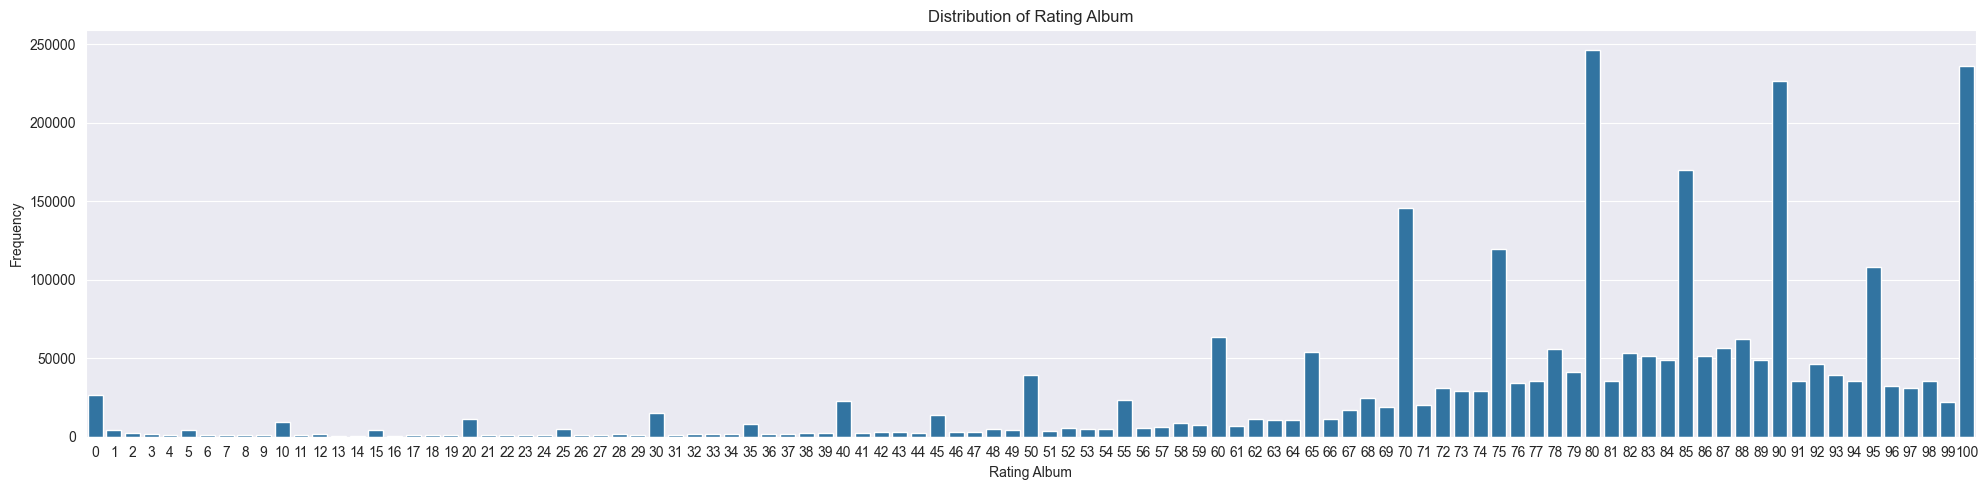

In [10]:
plt.figure(figsize=(20, 5))

sns.countplot(x=df_ratings["rating_album"])
plt.xlabel("Rating Album")
plt.ylabel("Frequency")
plt.title("Distribution of Rating Album")

plt.tight_layout()
plt.show()

In [11]:
plt.figure(figsize=(10, 5))

sns.countplot(df_ratings["link_user"])
plt.xlabel("Link User")
plt.ylabel("Frequency")
plt.title("Distribution of Link User")

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000213D24591C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000213FFB1C360> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# interaction_matrix = df_ratings.pivot_table(index='user', columns='link_album', values='rating_album')
interaction_matrix = df_ratings.pivot(index='user', columns='link_album', values='rating_album', aggregate_function="first")
interaction_matrix

In [22]:
interaction_matrix

user,https://www.albumoftheyear.org/album/618404-danny-brown-jpegmafia-scaring-the-hoes.php,https://www.albumoftheyear.org/album/321056-jid-the-forever-story.php,https://www.albumoftheyear.org/album/494992-kendrick-lamar-mr-morale-the-big-steppers.php,https://www.albumoftheyear.org/album/152796-tyler-the-creator-igor.php,https://www.albumoftheyear.org/album/108509-kids-see-ghosts-kids-see-ghosts.php,https://www.albumoftheyear.org/album/646040-random-encounters-fnaf-the-musical-original-soundtrack.php,https://www.albumoftheyear.org/album/54718-chance-the-rapper-coloring-book.php,https://www.albumoftheyear.org/album/48146-kanye-west-the-life-of-pablo.php,https://www.albumoftheyear.org/album/29250-kendrick-lamar-to-pimp-a-butterfly.php,https://www.albumoftheyear.org/album/13202-swans-to-be-kind.php,https://www.albumoftheyear.org/album/1998-kanye-west-my-beautiful-dark-twisted-fantasy.php,https://www.albumoftheyear.org/album/435-kanye-west-graduation.php,https://www.albumoftheyear.org/album/484-kanye-west-late-registration.php,https://www.albumoftheyear.org/album/7212-mf-doom-mmfood.php,https://www.albumoftheyear.org/album/503-madvillain-madvillainy.php,https://www.albumoftheyear.org/album/508-kanye-west-the-college-dropout.php,https://www.albumoftheyear.org/album/4129-gza-liquid-swords.php,https://www.albumoftheyear.org/album/4128-nas-illmatic.php,https://www.albumoftheyear.org/album/4127-wu-tang-clan-enter-wu-tang-36-chambers.php,https://www.albumoftheyear.org/album/6266-michael-jackson-thriller.php,https://www.albumoftheyear.org/album/6267-michael-jackson-off-the-wall.php,https://www.albumoftheyear.org/album/5662-david-bowie-heroes.php,https://www.albumoftheyear.org/album/5598-david-bowie-the-rise-and-fall-of-ziggy-stardust-and-the-spiders-from-mars.php,https://www.albumoftheyear.org/album/428719-jpegmafia-lp-offline.php,https://www.albumoftheyear.org/album/3840-kendrick-lamar-good-kid-maad-city.php,https://www.albumoftheyear.org/album/732985-sampha-lahai.php,https://www.albumoftheyear.org/album/339855-silk-sonic-an-evening-with-silk-sonic.php,https://www.albumoftheyear.org/album/380071-tyler-the-creator-call-me-if-you-get-lost.php,https://www.albumoftheyear.org/album/116105-mac-miller-swimming.php,https://www.albumoftheyear.org/album/112577-kanye-west-ye.php,https://www.albumoftheyear.org/album/111746-pusha-t-daytona.php,https://www.albumoftheyear.org/album/104953-kali-uchis-isolation.php,https://www.albumoftheyear.org/album/84324-tyler-the-creator-flower-boy.php,https://www.albumoftheyear.org/album/76870-kendrick-lamar-damn.php,https://www.albumoftheyear.org/album/65080-childish-gambino-awaken-my-love.php,https://www.albumoftheyear.org/album/51270-kendrick-lamar-untitled-unmastered.php,…,https://www.albumoftheyear.org/album/729761-glad2mecha-ill-treats-the-return-deluxe-edition.php,https://www.albumoftheyear.org/album/828251-achorda-before-i-could-speak.php,https://www.albumoftheyear.org/album/561052-mexican-slum-rats-slumrat.php,https://www.albumoftheyear.org/album/62460-peking-duk-songs-to-sweat-to.php,https://www.albumoftheyear.org/album/518766-george-michael-white-light.php,https://www.albumoftheyear.org/album/18339-inxs-listen-like-thieves.php,https://www.albumoftheyear.org/album/18338-inxs-the-swing.php,https://www.albumoftheyear.org/album/112523-boo-seeka-never-too-soon.php,https://www.albumoftheyear.org/album/525677-matthew-young-its-a-feeling.php,https://www.albumoftheyear.org/album/619928-kana-hanazawa-opportunity.php,https://www.albumoftheyear.org/album/770893-ice-nine-kills-welcome-to-horrorwood-under-fire.php,https://www.albumoftheyear.org/album/726056-rona-kenan--.php,https://www.albumoftheyear.org/album/33840-the-maccabees-marks-to-prove-it.php,https://www.albumoftheyear.org/album/875622-richard-jacques-metropolis-street-racer.php,https://www.albumoftheyear.org/album/449747-bing-crosby-christmas-classics.php,https://www.albumoftheyear.org/album/614633-the-harmonicats-selected-favorites.php,https://www.albumofth

In [27]:
df_filled = interaction_matrix.fill_nan(0)
# df_filled.T

In [28]:
df_filled

user,https://www.albumoftheyear.org/album/618404-danny-brown-jpegmafia-scaring-the-hoes.php,https://www.albumoftheyear.org/album/321056-jid-the-forever-story.php,https://www.albumoftheyear.org/album/494992-kendrick-lamar-mr-morale-the-big-steppers.php,https://www.albumoftheyear.org/album/152796-tyler-the-creator-igor.php,https://www.albumoftheyear.org/album/108509-kids-see-ghosts-kids-see-ghosts.php,https://www.albumoftheyear.org/album/646040-random-encounters-fnaf-the-musical-original-soundtrack.php,https://www.albumoftheyear.org/album/54718-chance-the-rapper-coloring-book.php,https://www.albumoftheyear.org/album/48146-kanye-west-the-life-of-pablo.php,https://www.albumoftheyear.org/album/29250-kendrick-lamar-to-pimp-a-butterfly.php,https://www.albumoftheyear.org/album/13202-swans-to-be-kind.php,https://www.albumoftheyear.org/album/1998-kanye-west-my-beautiful-dark-twisted-fantasy.php,https://www.albumoftheyear.org/album/435-kanye-west-graduation.php,https://www.albumoftheyear.org/album/484-kanye-west-late-registration.php,https://www.albumoftheyear.org/album/7212-mf-doom-mmfood.php,https://www.albumoftheyear.org/album/503-madvillain-madvillainy.php,https://www.albumoftheyear.org/album/508-kanye-west-the-college-dropout.php,https://www.albumoftheyear.org/album/4129-gza-liquid-swords.php,https://www.albumoftheyear.org/album/4128-nas-illmatic.php,https://www.albumoftheyear.org/album/4127-wu-tang-clan-enter-wu-tang-36-chambers.php,https://www.albumoftheyear.org/album/6266-michael-jackson-thriller.php,https://www.albumoftheyear.org/album/6267-michael-jackson-off-the-wall.php,https://www.albumoftheyear.org/album/5662-david-bowie-heroes.php,https://www.albumoftheyear.org/album/5598-david-bowie-the-rise-and-fall-of-ziggy-stardust-and-the-spiders-from-mars.php,https://www.albumoftheyear.org/album/428719-jpegmafia-lp-offline.php,https://www.albumoftheyear.org/album/3840-kendrick-lamar-good-kid-maad-city.php,https://www.albumoftheyear.org/album/732985-sampha-lahai.php,https://www.albumoftheyear.org/album/339855-silk-sonic-an-evening-with-silk-sonic.php,https://www.albumoftheyear.org/album/380071-tyler-the-creator-call-me-if-you-get-lost.php,https://www.albumoftheyear.org/album/116105-mac-miller-swimming.php,https://www.albumoftheyear.org/album/112577-kanye-west-ye.php,https://www.albumoftheyear.org/album/111746-pusha-t-daytona.php,https://www.albumoftheyear.org/album/104953-kali-uchis-isolation.php,https://www.albumoftheyear.org/album/84324-tyler-the-creator-flower-boy.php,https://www.albumoftheyear.org/album/76870-kendrick-lamar-damn.php,https://www.albumoftheyear.org/album/65080-childish-gambino-awaken-my-love.php,https://www.albumoftheyear.org/album/51270-kendrick-lamar-untitled-unmastered.php,…,https://www.albumoftheyear.org/album/729761-glad2mecha-ill-treats-the-return-deluxe-edition.php,https://www.albumoftheyear.org/album/828251-achorda-before-i-could-speak.php,https://www.albumoftheyear.org/album/561052-mexican-slum-rats-slumrat.php,https://www.albumoftheyear.org/album/62460-peking-duk-songs-to-sweat-to.php,https://www.albumoftheyear.org/album/518766-george-michael-white-light.php,https://www.albumoftheyear.org/album/18339-inxs-listen-like-thieves.php,https://www.albumoftheyear.org/album/18338-inxs-the-swing.php,https://www.albumoftheyear.org/album/112523-boo-seeka-never-too-soon.php,https://www.albumoftheyear.org/album/525677-matthew-young-its-a-feeling.php,https://www.albumoftheyear.org/album/619928-kana-hanazawa-opportunity.php,https://www.albumoftheyear.org/album/770893-ice-nine-kills-welcome-to-horrorwood-under-fire.php,https://www.albumoftheyear.org/album/726056-rona-kenan--.php,https://www.albumoftheyear.org/album/33840-the-maccabees-marks-to-prove-it.php,https://www.albumoftheyear.org/album/875622-richard-jacques-metropolis-street-racer.php,https://www.albumoftheyear.org/album/449747-bing-crosby-christmas-classics.php,https://www.albumoftheyear.org/album/614633-the-harmonicats-selected-favorites.php,https://www.albumofth

In [29]:
def standardize(row):
    new_row =(row - row.mean())/(row.max()-row.min())
    return new_row

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

ratings_std= df_filled.map_rows(standardize)
ratings_std = ratings_std.fillna(0)
item_similarity=cosine_similarity(ratings_std.T)
item_similarity

AttributeError: 'tuple' object has no attribute 'mean'

In [18]:
item_similarity_df = pd.DataFrame(item_similarity,
                                  index=ratings_std.columns,
                                  columns=ratings_std.columns)

item_similarity_df.T

In [19]:
def get_similar_album(album_name, user_rating):
    similar_score = item_similarity_df[album_name]*(user_rating-50)
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score

In [20]:
get_similar_album('https://www.albumoftheyear.org/album/100249-the-brobecks-violent-things.php', 80)

In [21]:
def get_similar_more_albums(user_ratings):
    total_scores = pd.Series(dtype=float)
    for album, rating in user_ratings:
        similar_scores = item_similarity_df[album] * (rating - 50)
        total_scores = total_scores.add(similar_scores, fill_value=0)
    total_scores = total_scores.sort_values(ascending=False)
    return total_scores


In [22]:
user_ratings = [
    ("https://www.albumoftheyear.org/album/100249-the-brobecks-violent-things.php", 5),
    ("https://www.albumoftheyear.org/album/100035-young-fathers-cocoa-sugar.php", 100),
    ("https://www.albumoftheyear.org/album/101215-mom-jeans-best-buds.php", 10)
]

In [23]:
#nyoba all taylor swift
user_ratings = [('https://www.albumoftheyear.org/album/541510-taylor-swift-midnights.php',100),
       ('https://www.albumoftheyear.org/album/934464-taylor-swift-the-tortured-poets-department-the-anthology.php', 100),
       ('https://www.albumoftheyear.org/album/313572-taylor-swift-evermore.php',100),
       ('https://www.albumoftheyear.org/album/264058-taylor-swift-folklore.php',100)]

In [24]:
hasil = pd.DataFrame(get_similar_more_albums(user_ratings), columns=['score'])
hasil_data = get_similar_more_albums(user_ratings)
hasil = pd.DataFrame(hasil_data, columns=['score'])
hasil['link_album'] = hasil_data.index
hasil = hasil.reset_index(drop=True)

hasil

In [25]:
hasil

In [27]:
df_albums = pd.read_csv('dataset/albums.csv', sep=';')
df_albums

In [28]:
hasil.dtypes

In [29]:
df_hasil = df_albums.join(hasil.set_index("link_album"), on='link_album')
df_hasil

In [30]:
taylor_swift_data = df_hasil[df_hasil['artis'] == 'Taylor Swift']
taylor_swift_data['link_album'].unique()

In [31]:
sorted = df_hasil.sort_values(by='score', ascending=False)
top_10 =sorted.head(10)
top_10

In [32]:
df_hasil.score.nunique()

# **Content Based Filtering**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tabel = pd.DataFrame({
    'link_album': df_albums['link_album'],
    'genre': df_albums['genre'],
    'artis': df_albums['artis'],
    'label': df_albums['label'],
    'produser': df_albums['produser'],
    'penulis': df_albums['penulis']
})

tabel = tabel.apply(lambda x: x.str.replace(' ', '_'))
tabel = tabel.apply(lambda x: x.str.replace('!', ''))
tabel = tabel.apply(lambda x: x.str.replace('?', ''))
tabel = tabel.apply(lambda x: x.str.replace('/', ''))
tabel = tabel.apply(lambda x: x.str.replace('-', '_'))
tabel = tabel.apply(lambda x: x.str.replace("'", '_'))
tabel = tabel.apply(lambda x: x.str.replace(';|', ' '))

combined = pd.DataFrame({
    'link_album': tabel['link_album'],
    'corpus': tabel[['genre', 'artis', 'label', 'produser', 'penulis']].apply(lambda x: ' '.join(map(str, x)), axis=1)
})

combined = combined.set_index('link_album')
combined = combined.apply(lambda x: x.str.replace('nan', ''))
combined

In [35]:
corpus=combined.corpus.tolist()
corpus

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_similarity(query):
    tfidf_vectorizer = TfidfVectorizer()
    corpus = combined['corpus'].values
    tfidf_vectorizer.fit(corpus)
    query_tfidf = tfidf_vectorizer.transform([query])
    corpus_tfidf = tfidf_vectorizer.transform(corpus)

    similarity_scores = query_tfidf.dot(corpus_tfidf.T)

    similarity_scores_dense = similarity_scores.toarray()

    sorted_indices = np.argsort(similarity_scores_dense)[0][::-1]

    relevant_links = combined.index[sorted_indices].tolist()

    tfidf_scores = similarity_scores_dense[0][sorted_indices]

    result = pd.DataFrame({'link_album': relevant_links, 'tfidf_score': tfidf_scores}).set_index('link_album')
    result = result.apply(lambda x: x.str.replace('_', '-'))
    return result

In [39]:
links = [
    'https://www.albumoftheyear.org/album/541510-taylor-swift-midnights.php',
    'https://www.albumoftheyear.org/album/934464-taylor-swift-the-tortured-poets-department-the-anthology.php',
    'https://www.albumoftheyear.org/album/313572-taylor-swift-evermore.php',
    'https://www.albumoftheyear.org/album/264058-taylor-swift-folklore.php'
    ]

for i in range(len(links)):
    links[i] = links[i].replace("-", "_")

query = combined.loc[combined.index.isin(links)]
column_values = query['corpus'].astype(str)
combined_string = ' '.join(column_values)
words = combined_string.split()
unique_words = list(set(words))
query = ' '.join(unique_words)
result= tfidf_similarity(query)
result = result.drop(result.index[:len(links)])
result = result.apply(lambda x: x.str.replace('_', '-'))
result.head(10)